<a href="https://colab.research.google.com/github/DhruvDoshi/TA-1109/blob/main/Numpy_%26_NetworkX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



In today's session, we will briefly learn about **NumPy** and **NetworkX** libraries of Python.


<!-- - Graphs of the Caenorhabditis elegans or power grids or movie actors that were used in the following paper: -->
<!-- "Collective dynamics of ‘small-world’ networks" (Duncan J. Watts & Steven H. Strogatz) -->
- Use of Pearson correlation + regression line
- PageRank method from NetworkX




---




# NetworkX

In this lab session, we will learn how to use NetworkX

At the end of this session, you should know how to:

1. Define the nodes and vertices of a graph (in NetworkX)

2. Plot undirected graphs

3. Calculate the distribution of degrees

4. Calculate the shortest path between 2 nodes of a graph

## Defining Graphs in *NetworkX*

A graph is a data structure defined by a set of **nodes** and a set of **edges** where each edge links a pair of nodes.




Examples:


*   [Facebook's Social Graph](https://developers.facebook.com/docs/graph-api) 
*   Google's Knowledge Graph
*   [Yelp's Local Graph](https://engineeringblog.yelp.com/2017/05/introducing-yelps-local-graph.html)
*   Path Optimization Algorithms - e.g. Google Maps, Flight networks, GPS navigation systems



Types of graphs:

1.   Directed (Oriented graphs)
2.   Undirected (Unoriented graphs)
3.   Unweighted graphs
4.   Weighted graphs


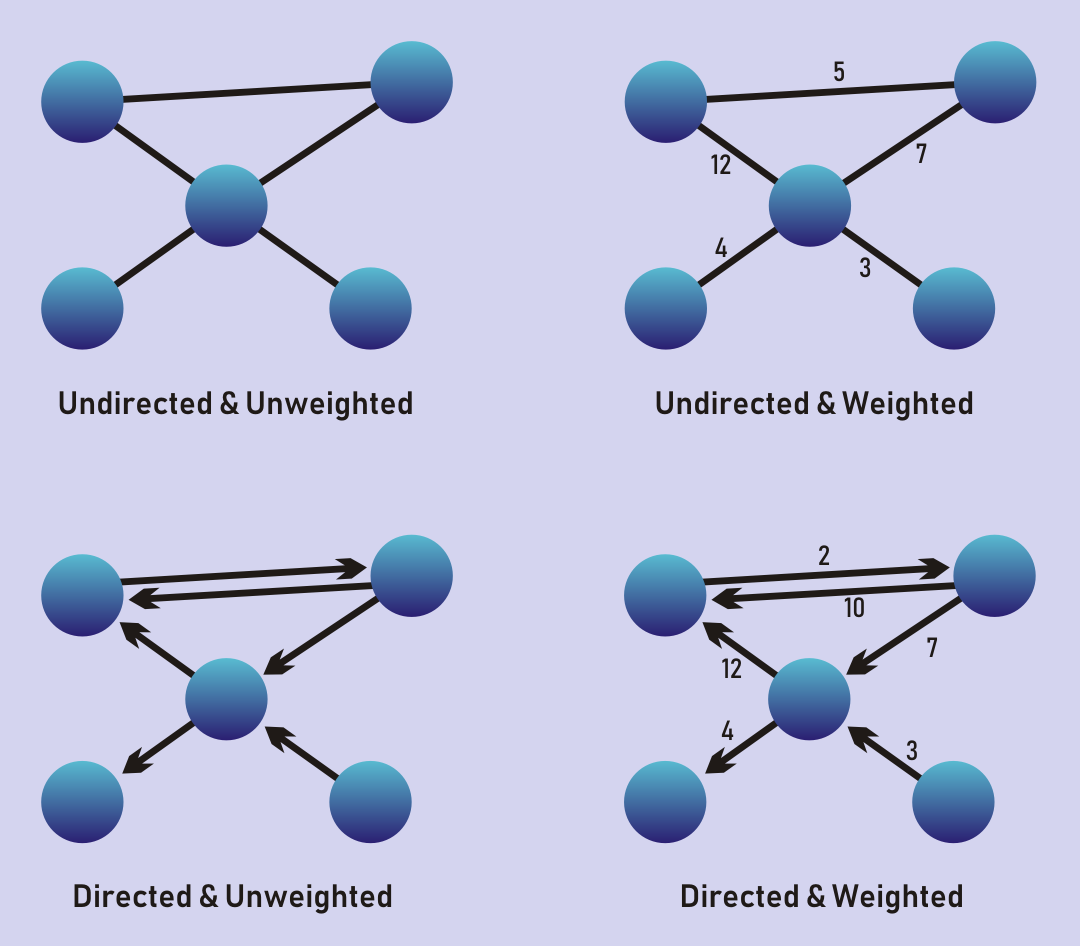

To define a graph from scratch, first create an empty graph

In [ ]:
# import the networkx module
import networkx as nx

# define an empty graph and give it a name, here G
G = nx.Graph()

# to define a directed graph use:
# G1=nx.DiGraph()

You can add nodes to the graph one at a time

In [ ]:
G.add_node(1)
G.add_node('a')
G.add_node(3)

# if you repeat nodes they will not be added again

G.add_node(1)

You can also add nodes from a list

In [ ]:
G.add_nodes_from([1,'a',3])

In [ ]:
G.add_node(5.7)

G.nodes()

NodeView((1, 'a', 3, 5.7))

Let's add some edges

In [ ]:
G.add_edge(1,2) # G.add_edge(2,1)
G.add_edge(2,'a')

G.add_edges_from([(3,'b'),('ppp','a')])

G.edges()
# G.nodes()

EdgeView([(1, 2), ('a', 2), ('a', 'ppp'), (3, 'b')])

To see the nodes and edges of a graph, use G.nodes() & G.edges() 

In [ ]:
print("The nodes of my graph G",G.nodes())
print("The edges of my graph G",G.edges())

The nodes of my graph G [1, 'a', 3, 5.7, 2, 'b', 'ppp']
The edges of my graph G [(1, 2), ('a', 2), ('a', 'ppp'), (3, 'b')]


Let's create a weighted graph

In [ ]:
import networkx as nx

G = nx.Graph()

G.add_edge('a', 'b', weight=0.6)
G.add_edge('a', 'c', weight=0.2)
G.add_edge('c', 'd', weight=0.1)
G.add_edge('c', 'e', weight=0.7)
G.add_edge('c', 'f', weight=0.9)
G.add_edge('a', 'd', weight=0.3)
G.nodes, G.edges

# you can also add weights from a list of tuples:
G2 = nx.Graph()
list_arcs = [(1,2,2.0) , (1,3,4.0) , (2,3,1.0) , (2,4,4.0) , (2,5,2.0) , (3,5,3.0) , (4,6,2.0) , (5,4,3.0) , (5,6,2.0)]
G2.add_weighted_edges_from(list_arcs)

Saving the Adjacency Matrix

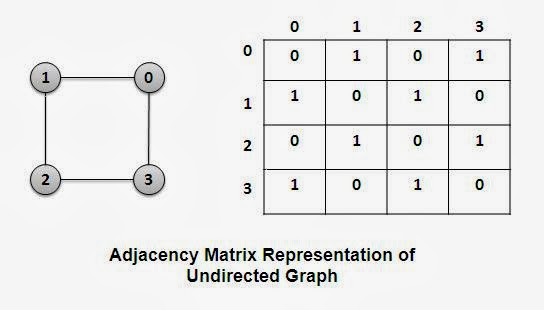

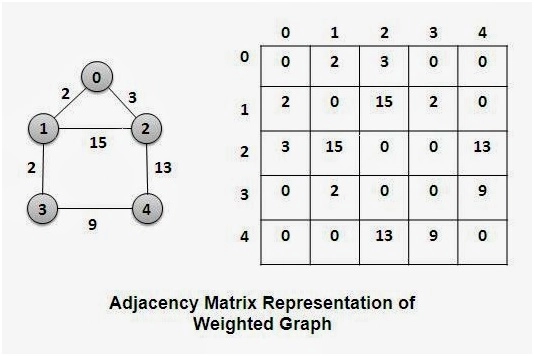

In [ ]:
import pandas as pd

df = nx.to_pandas_adjacency(G)
df

,a,b,c,d,e,f
a,0.0,0.6,0.2,0.3,0.0,0.0
b,0.6,0.0,0.0,0.0,0.0,0.0
c,0.2,0.0,0.0,0.1,0.7,0.9
d,0.3,0.0,0.1,0.0,0.0,0.0
e,0.0,0.0,0.7,0.0,0.0,0.0
f,0.0,0.0,0.9,0.0,0.0,0.0




---


## Drawing Graphs

Visualizing graphs can help in understanding graph properties.



### Draw networks with Matplotlib

`draw()` - Draw the graph as a simple representation with no node labels or edge labels and using the full Matplotlib figure area and no axis labels by default. <br><br>
`draw_networkx()` - Draw the graph with Matplotlib with options for node positions, labeling, titles, and many other drawing features.<br><br>
`draw_networkx_nodes()` - This draws only the nodes of the graph G. <br><br>
`draw_networkx_edges()` - This draws only the edges of the graph G. <br><br>
`draw_networkx_labels()` - Draw node labels on the graph G. <br><br>





***Graph Layout*** : Node positioning algorithms for graph drawing.

`circular_layout()` - Position nodes on a circle. <br>
`random_layout()`   - Position nodes uniformly at random in the unit square. <br>
`spring_layout()`   - Position nodes using Fruchterman-Reingold [force-directed algorithm](https://en.wikipedia.org/wiki/Force-directed_graph_drawing).

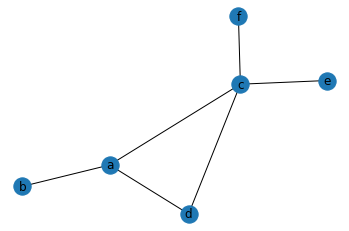

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge('a', 'b', weight=0.6)
G.add_edge('a', 'c', weight=0.2)
G.add_edge('c', 'd', weight=0.1)
G.add_edge('c', 'e', weight=0.7)
G.add_edge('c', 'f', weight=0.9)
G.add_edge('a', 'd', weight=0.3)

# drawing graphs

# nx.draw(G)

# (or)

# A position will be assigned to every node in G

pos = nx.spring_layout(G)      # a dictionary that contains {'node1': array([x-coordinate,  y-coordinate]), 'node2': array([x-coordinate,  y-coordinate])...}
# pos = nx.circular_layout(G)    
# pos = nx.random_layout(G)      

nx.draw_networkx(G, pos)

# (or)

# nx.draw_networkx_nodes(G, pos)
# nx.draw_networkx_edges(G, pos)
# nx.draw_networkx_labels(G, pos)

plt.axis('off')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge('a', 'b', weight=0.6)
G.add_edge('a', 'c', weight=0.2)
G.add_edge('c', 'd', weight=0.1)
G.add_edge('c', 'e', weight=0.7)
G.add_edge('c', 'f', weight=0.9)
G.add_edge('a', 'd', weight=0.3)

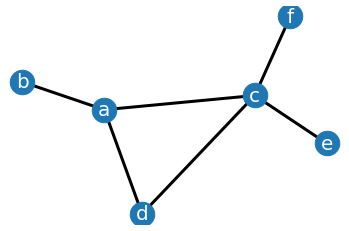

In [ ]:
pos = nx.spring_layout(G) 
# try other layouts

nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_size=600, alpha=1) 
# change the following:
#     node_size=100 
#     alpha=0.5
#     node_color='red'

nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=3, alpha=1) 
# # change edgelist=[('a','b'),('d','a'),('a','e')]

nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif', font_color='white')

plt.axis('off')
plt.show()

### Erdos-Renyi Random graphs

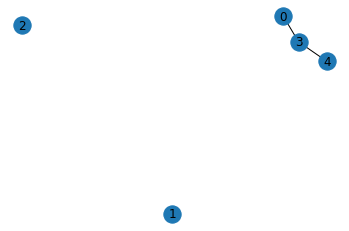

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

num_of_nodes  = 5
prob_of_edges = 0.2  # every possible edge occurs independently with probability 0 < p < 1
G = nx.gnp_random_graph(num_of_nodes, prob_of_edges)

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)

plt.axis('off')
plt.show()

In [ ]:
c = nx.connected_components(G)
for comp in c:
  print(comp)

{0, 3, 4}
{1}
{2}


## Degree Distribution

The degree of a node is the number of neighbors of the node.

To calculate the degree of one node, use the following code:

In [ ]:
# if 'a' is a node of graph G
# this calculates the degree of 'a' in G
G.degree(4)

1

In [ ]:
# What is the degree of node 'c' in graph G?

G.degree('c')

DegreeView({})

## Computing Shortest Paths

1. How to print (one of the) shortest path(s) between a source node and a target node?

2. Calculate the distance along (any of) these shortest paths.

SEVERAL METHODS EXIST FOR THE CALCULATION OF THE SHORTEST PATH(S)

One famous method is to use **Djykstra's algorithm**

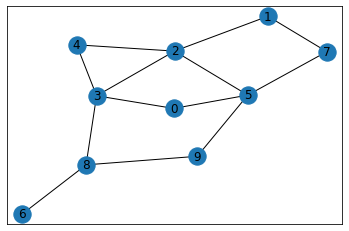

In [ ]:
import networkx as nx

# each run of this code will produce a new random version of G
# generate a random graph with 20 nodes and an edge  probability of 0.3
G = nx.gnp_random_graph(10, 0.3)

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)

In [ ]:
#any of these two methods will work

# sp1 = nx.shortest_path(G, source = 4, target = 8)   # by default it is 'dijkstra' algorithm
# sp1

sp2 = nx.dijkstra_path(G, source = 1, target = 6)
sp2

[1, 2, 3, 8, 6]

Can you guess the output of the following before running it?

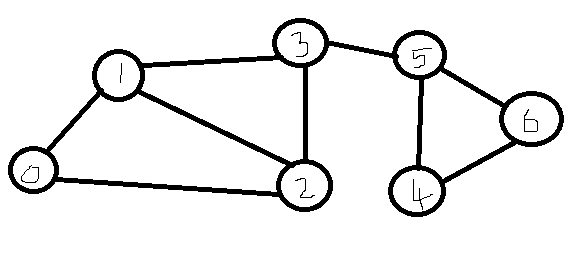

In [ ]:
import networkx as nx

a=nx.Graph()   

a.add_edge( 0, 1) 
a.add_edge( 0, 2) 
a.add_edge( 1, 2) 
a.add_edge( 1, 3) 
a.add_edge( 2, 3) 
a.add_edge( 3, 5) #
a.add_edge( 4, 5) 
a.add_edge( 4, 6) 
a.add_edge( 5, 6)

print(nx.dijkstra_path_length(a,source=0,target=6))

4


To determine if there exists a path that connects a source node to a target node in a graph, you can use the function `has_path()`

This will return a boolean that is 

- True if there is a path 
- False if there is no path

In [ ]:
nx.has_path(a,source=0,target=6)

True

## [PageRank](https://https://en.wikipedia.org/wiki/PageRank) method

PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links. 


In [ ]:
import networkx as nx

# Let's create an empty directed graph
G=nx.DiGraph()

In [ ]:
# add nodes and edges to our graph
# a list of nodes:
pages = ["1","2","3","4"]
G.add_nodes_from(pages)
G.add_edges_from([('1','2'), ('1','4'),('1','3'), ('4','1'),('2','3'),('2','4'),('3','1'),('4','3')])

print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())

Nodes of graph: 
['1', '2', '3', '4']
Edges of graph: 
[('1', '2'), ('1', '4'), ('1', '3'), ('2', '3'), ('2', '4'), ('3', '1'), ('4', '1'), ('4', '3')]


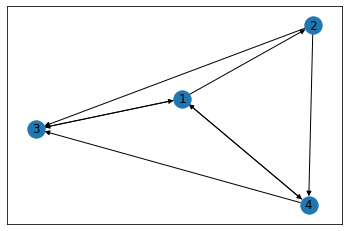

In [ ]:
# visualize our graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)

In [ ]:
# The function G.out_edges('node') returns the numbers of nodes 'node' links to.

print("Number of outward links for each node:")
for page in pages:
    print(["Page %s = %s"% (page,str(len(G.out_edges(page))))])

Number of outward links for each node:
['Page 1 = 3']
['Page 2 = 2']
['Page 3 = 1']
['Page 4 = 2']


**Steps in PageRank:**

1. Start by assigning a score between 0 and 1 to each page. In the beginning, if there are N pages, then usually it is 1/N. That score is called its PageRank.

2. All the PageRanks add up to 1.

3. At each time step, the computation yields
$P R\left(p_{i} ; t+1\right)=\frac{1-d}{N}+d \sum_{p_{j} \in M\left(p_{i}\right)} \frac{P R\left(p_{j} ; t\right)}{L\left(p_{j}\right)}$

    where $d$ is the damping factor.

4. Keep updating the PageRank values until the procedure converges, i.e., computation ends when for some small ${\epsilon}$,
$|P R\left(p_{i} ; t+1\right)-P R\left(p_{i} ; t\right)|<\epsilon$

Using the adjacency matrix we can compute the PageRank for a particular graph. 

In [ ]:
"""PageRank algorithm with explicit number of iterations.

Returns
-------
ranking of nodes (pages) in the adjacency matrix

"""

import numpy as np

def pagerank(M, num_iterations: int = 100, d: float = 0.85):
    """PageRank: The trillion dollar algorithm.

    Parameters
    ----------
    M : numpy array
        adjacency matrix where M_i,j represents the link from 'j' to 'i', such that for all 'j'
        sum(i, M_i,j) = 1
    num_iterations : int, optional
        number of iterations, by default 100
    d : float, optional
        damping factor, by default 0.85

    Returns
    -------
    numpy array
        a vector of ranks such that v_i is the i-th rank from [0, 1],
        v sums to 1

    """
    N = M.shape[1]
    v = np.random.rand(N, 1)
    v = v / np.linalg.norm(v, 1)
    M_hat = (d * M + (1 - d) / N)
    for i in range(num_iterations):
        v = M_hat @ v
    return v

M = np.array([[    0,   0, 1, 0.5],
              [1.0/3,   0, 0, 0  ],
              [1.0/3, 0.5, 0, 0.5],
              [1.0/3, 0.5, 0, 0  ]])

v = pagerank(M, 100, 0.85)

In [ ]:
v

array([[0.36815068],
       [0.14180936],
       [0.28796163],
       [0.20207834]])

We can implement PageRank using NetworkX simply by calling `nx.pagerank()`

In [ ]:
# initially the 4 pages are assigned the PageRank value {'1': 0.25, '2': 0.25, '3': 0.25, '4': 0.25}
pr = nx.pagerank(G, max_iter=100, alpha=0.85) # alpha is the damping factor

# After some iterations the values converge
print(pr)

{'1': 0.3681509531104541, '2': 0.14180962694364857, '3': 0.28796129337481546, '4': 0.2020781265710818}


Note: The eigenvector calculation is done by the power iteration method and has no guarantee of convergence. The iteration will stop after max_iter iterations or an error tolerance of number_of_nodes(G)*tol has been reached.

The PageRank algorithm was designed for directed graphs but this algorithm does not check if the input graph is directed and will execute on undirected graphs by converting each edge in the directed graph to two edges.

In [ ]:
# Can you do the PageRank for the following adjacency matrix?

np.array([[  0, 0,   0, 0, 1],
          [0.5, 0,   0, 0, 0],
          [0.5, 0,   0, 0, 0],
          [  0, 1, 0.5, 0, 0],
          [  0, 0, 0.5, 1, 0]])



---



# NumPy

## What is NumPy (Numerical Python)?


*   Open-source python library
*   Used for working with multidimensional array and matrix data structures

Please refer the [NumPy official documentation](https://numpy.org/doc/stable/user/absolute_beginners.html) for a detailed explanation.

## Lists Vs NumPy arrays


*   List as arrays are slow
*   NumPy arrays are 50x faster than Lists
*   NumPy uses much less memory to store data
*   Elements in a list can be heterogenous, elements in a NumPy array should be homogenous



In [ ]:
list_example = [2, 1.2, [1,2], {1:2}]

In [ ]:
import numpy as np

Let's create a simple array...

In [ ]:
arr = np.array([1,3,4,6,7,8,0])

In [ ]:
a = np.array([101, 102, 103, 104, 105, 106], dtype='int32')

In [ ]:
type(a[0])

numpy.int32

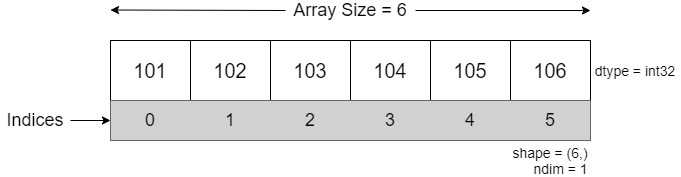

In [ ]:
flt1 = np.array([[5.6, 4.6],
                 [7.8, 9.8]])

In [ ]:
flt1 0,1 -> 1,0

array([[5.6, 4.6],
       [7.8, 9.8]])

In [ ]:
flt1.T # transpose

array([[5.6, 7.8],
       [4.6, 9.8]])

In [ ]:
flt1.shape

(2, 2)

In [ ]:
a.shape # size along each dimension

(6,)

In [ ]:
a.dtype # datatype

dtype('int32')

In [ ]:
flt1.dtype

dtype('float64')

In [ ]:
a.size # total number of elements

6

In [ ]:
a.ndim # number of dimensions

1

In [ ]:
flt1.ndim

2

Accessing the elements of an array...

In [ ]:
a[0] # first element has index 0

101

In [ ]:
a[-1] # similar to accessing lists

106

## N-Dimensional Array

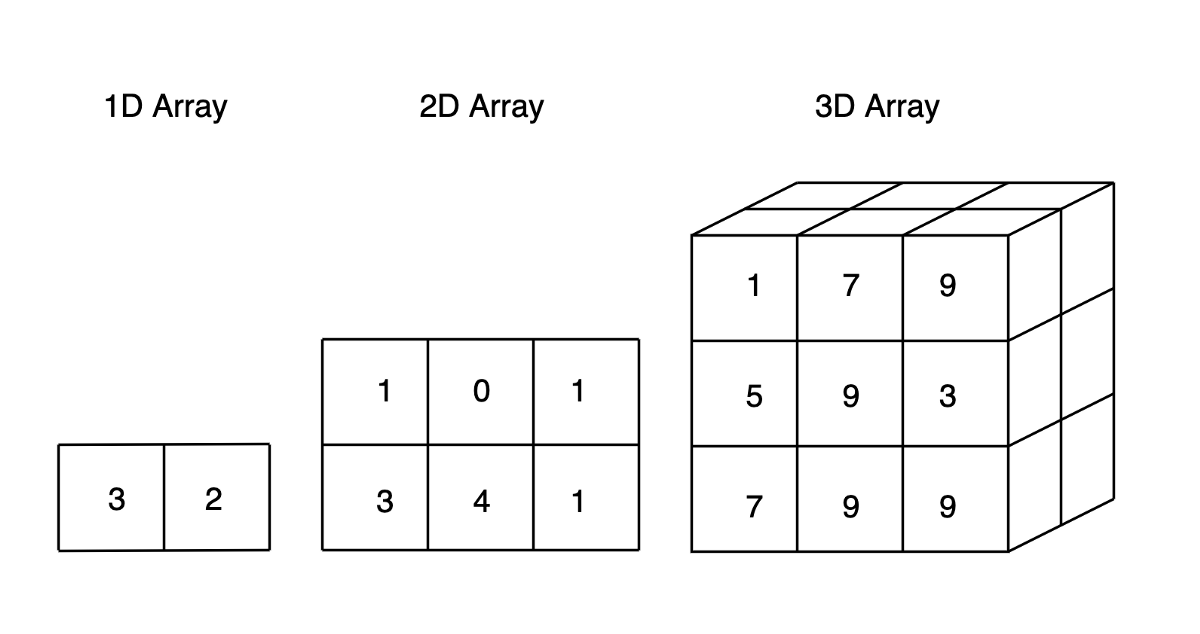

1-D array = vector <br>
2-D array = matrix <br>
3-D or higher = tensor <br>

In [ ]:
a = np.array([1, 2, 3, 4, 5, 6])

In [ ]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [ ]:
a.shape

(3, 4)

## Basic Array Operations

Let's try the 4 basic operations on arrays:
addition, subtraction, multiplication, division

In [ ]:
# addition

data = np.array([1, 2])
ones = np.ones(2, dtype=int)

data + ones

array([2, 3])

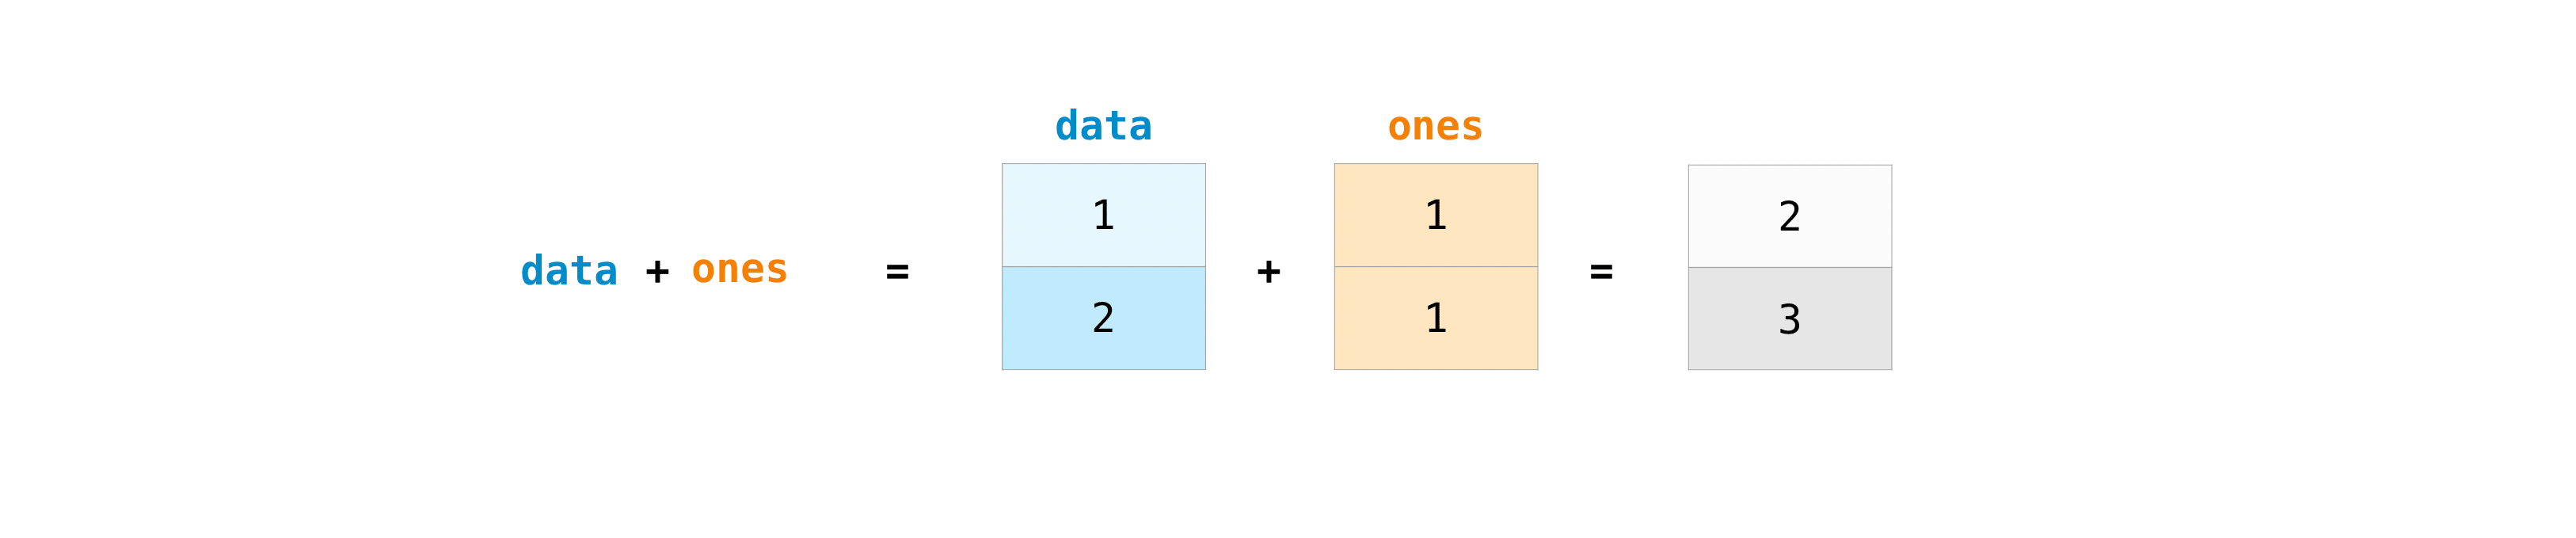

In [ ]:
# subtraction
print(data - ones)

# multiplication
print(data * data)

# division
print(data / data)

[0 1]
[1 4]
[1. 1.]


In [ ]:
data @ data # matrix mult

5

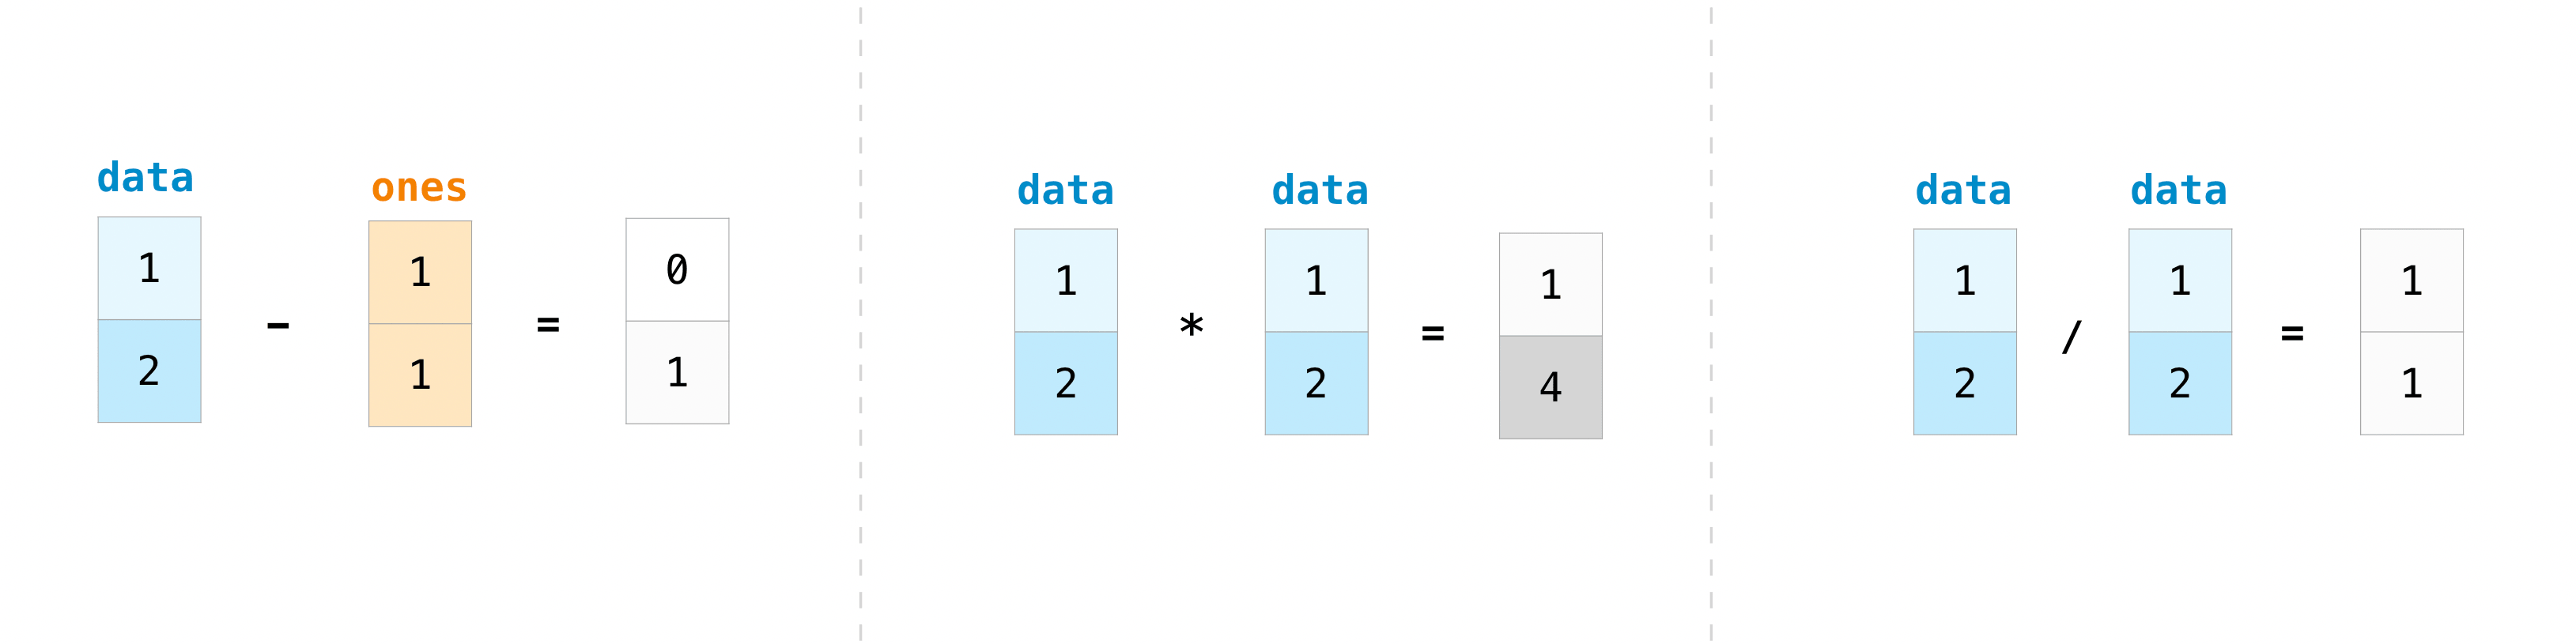

**Aggregate functions**: min, max, sum, mean, prod <br>

Here, 

axis=0 means across columns <br>
axis=1 means across rows

In [ ]:
data = np.array([[1, 2], 
                 [3, 4],
                 [5, 6]]) # 3 x 2

# data.max()

# data.min(axis=0) # 2D = [0,1]
                # 3D = [0,1,2]

data[1].sum() # [3, 4] = 3 + 4 = 7

data.prod() # 1 * 2 *... * 6 = 6!

data.mean(axis=1) # 1.5, 3.5, 5.5

array([1.5, 3.5, 5.5])

## Plotting arrays with Matplotlib

Size of the array is 13


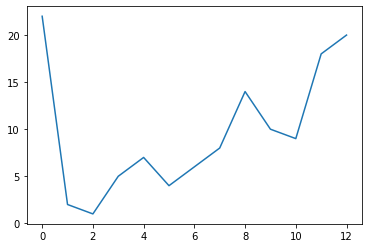

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

a = np.array([22, 2, 1, 5, 7, 4, 6, 8, 14, 10, 9, 18, 20])
b = np.arange(13)

print("Size of the array is",a.size)

plt.plot(a)  # plot y using x as index array 0..N-1
plt.show()

## Pearson Correlation & Regression Line

Correlation measures the degree to which two variables are related to each other. There are many methods of correlation, namely, Pearson, Spearman, Kendall-Tau and so on.

**Pearson correlation** is a measure of linear correlation between two sets of data. The result always has a value between −1 and 1.


In [ ]:
import pandas as pd

titanic = pd.read_excel("titanic.xls")

In [ ]:
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [ ]:
corr = titanic.corr(method="pearson")
corr

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


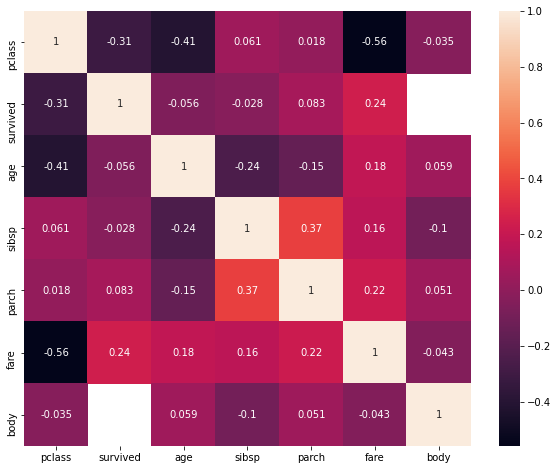

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True)

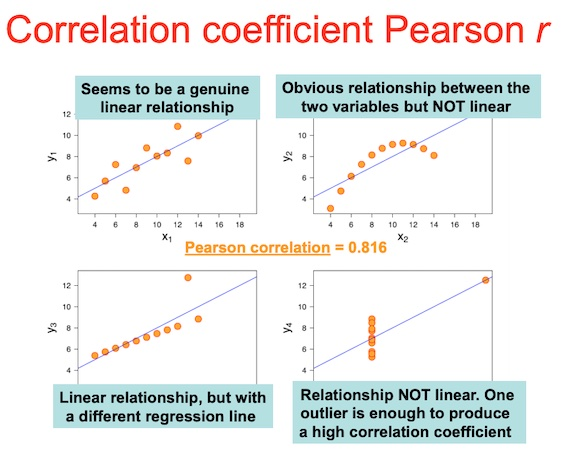

Example of Pearson Correlation on Randomly generated data.

Take away from next cell?
* Correlation of linear data, and random data (with Normal distribution)

(You can skip the part where we generate the data)

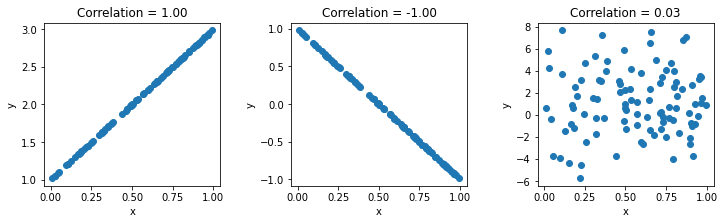

In [ ]:
rand = np.random.RandomState(12345)

#generating data
x = rand.uniform(0,1,100)
x = np.vstack((x,x*2+1))
x = np.vstack((x,-x[0,]*2+1))
x = np.vstack((x,rand.normal(1,3,100)))

#calculate the pearson correltioan
rho = np.corrcoef(x)

#plotting data 
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
for i in [0,1,2]:
    ax[i].scatter(x[0,],x[1+i,])
    ax[i].title.set_text('Correlation = ' + "{:.2f}".format(rho[0,i+1]))
    ax[i].set(xlabel='x',ylabel='y')
fig.subplots_adjust(wspace=.4)    
plt.show()

### Linear Regression

Linear regression assumes a linear relationship between the input (x) and output variables (y). 

It models the line equation $y = mx + b$ where $m$ is the slope of that line and $b$ is the bias.


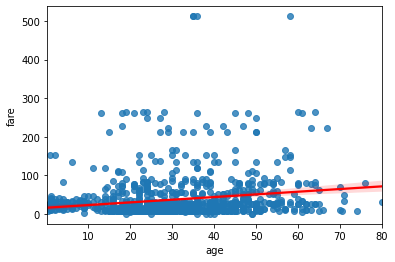

In [ ]:
sns.regplot(x = "age", y = "fare", data = titanic, line_kws={'color':'r'})
plt.show()

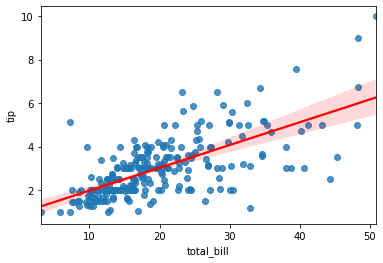

In [ ]:
# another dataset 

df = sb.load_dataset('tips')
sns.regplot(x = "total_bill", y = "tip", data = df, line_kws={'color':'r'})
plt.show()

## Exercise

Can you implement this formula in NumPy?

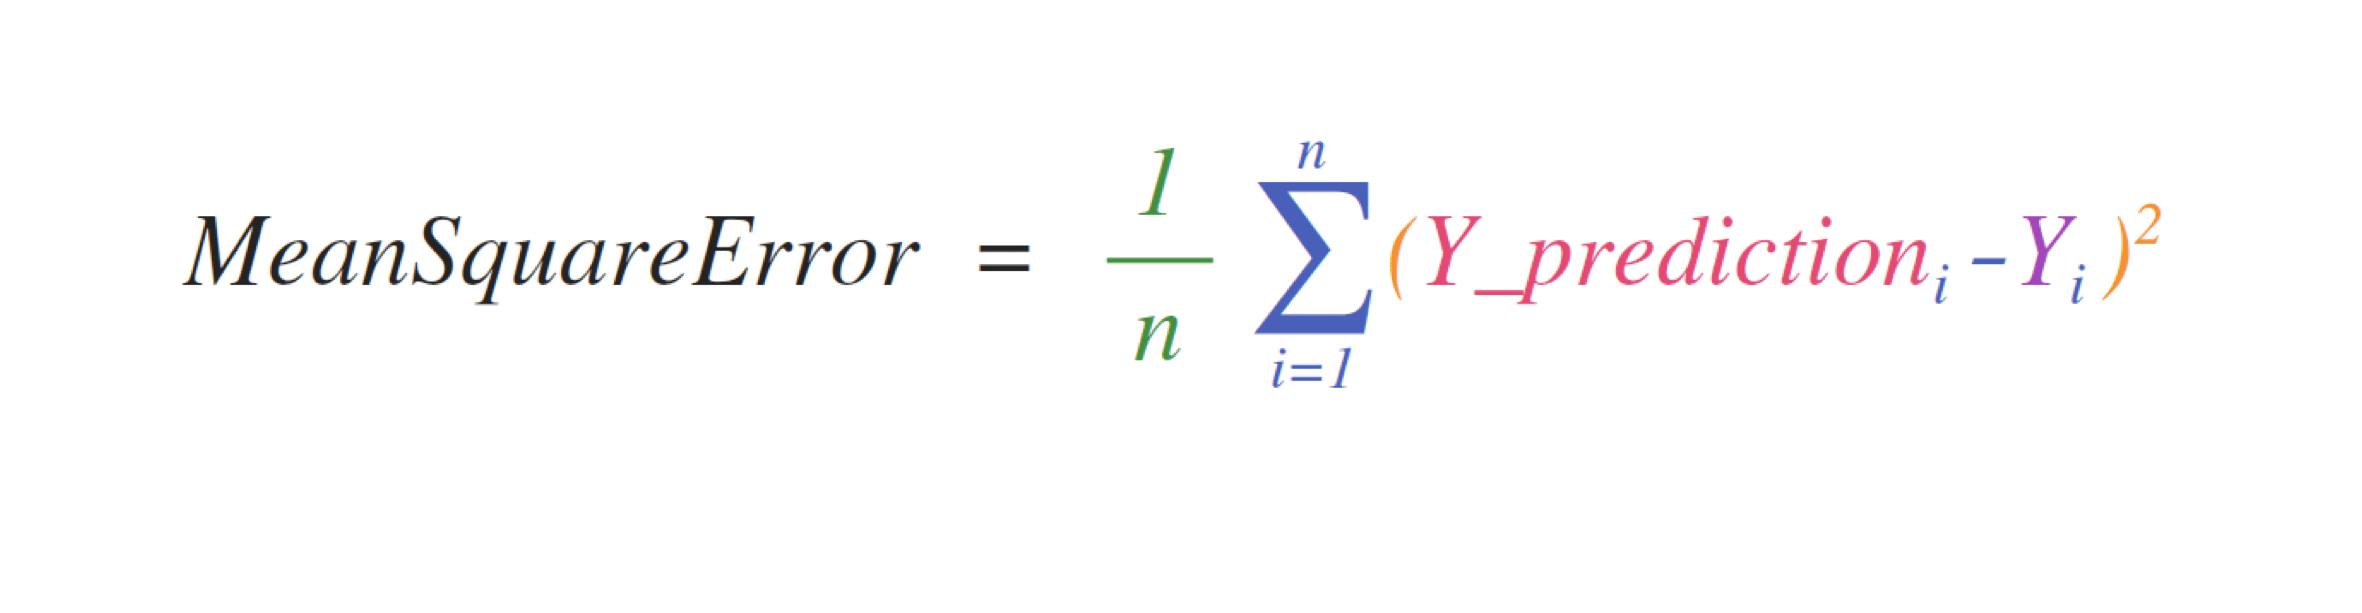

In [ ]:
# Consider Y_predictions & Y are two lists of the same size

# Hint:

# Use np.sum() for summation
# Use np.square() for whole squared

## Extras: More on Numpy

## Array Creation

* np.array()
* np.zeros()
* np.ones()
* np.arange()

In [ ]:
# np.array - All you need to do to create a simple array is pass a list to it. 

np.array([1,2,3])

array([1, 2, 3])

In [ ]:
# np.zeros - You can also create an array filled with 0’s

np.zeros(5, dtype='int32') # give any integer

array([0, 0, 0, 0, 0], dtype=int32)

In [ ]:
# np.arange - Create an array with a range of elements

np.arange(4)

array([0, 1, 2, 3])

In [ ]:
arr = np.arange(2, 8, 3) # what are the 3 values in the parentheses?
arr

array([2, 5])

## Transpose & Reshape

Use `arr.transpose()` to reverse or change the axes of an array according to the values you specify.

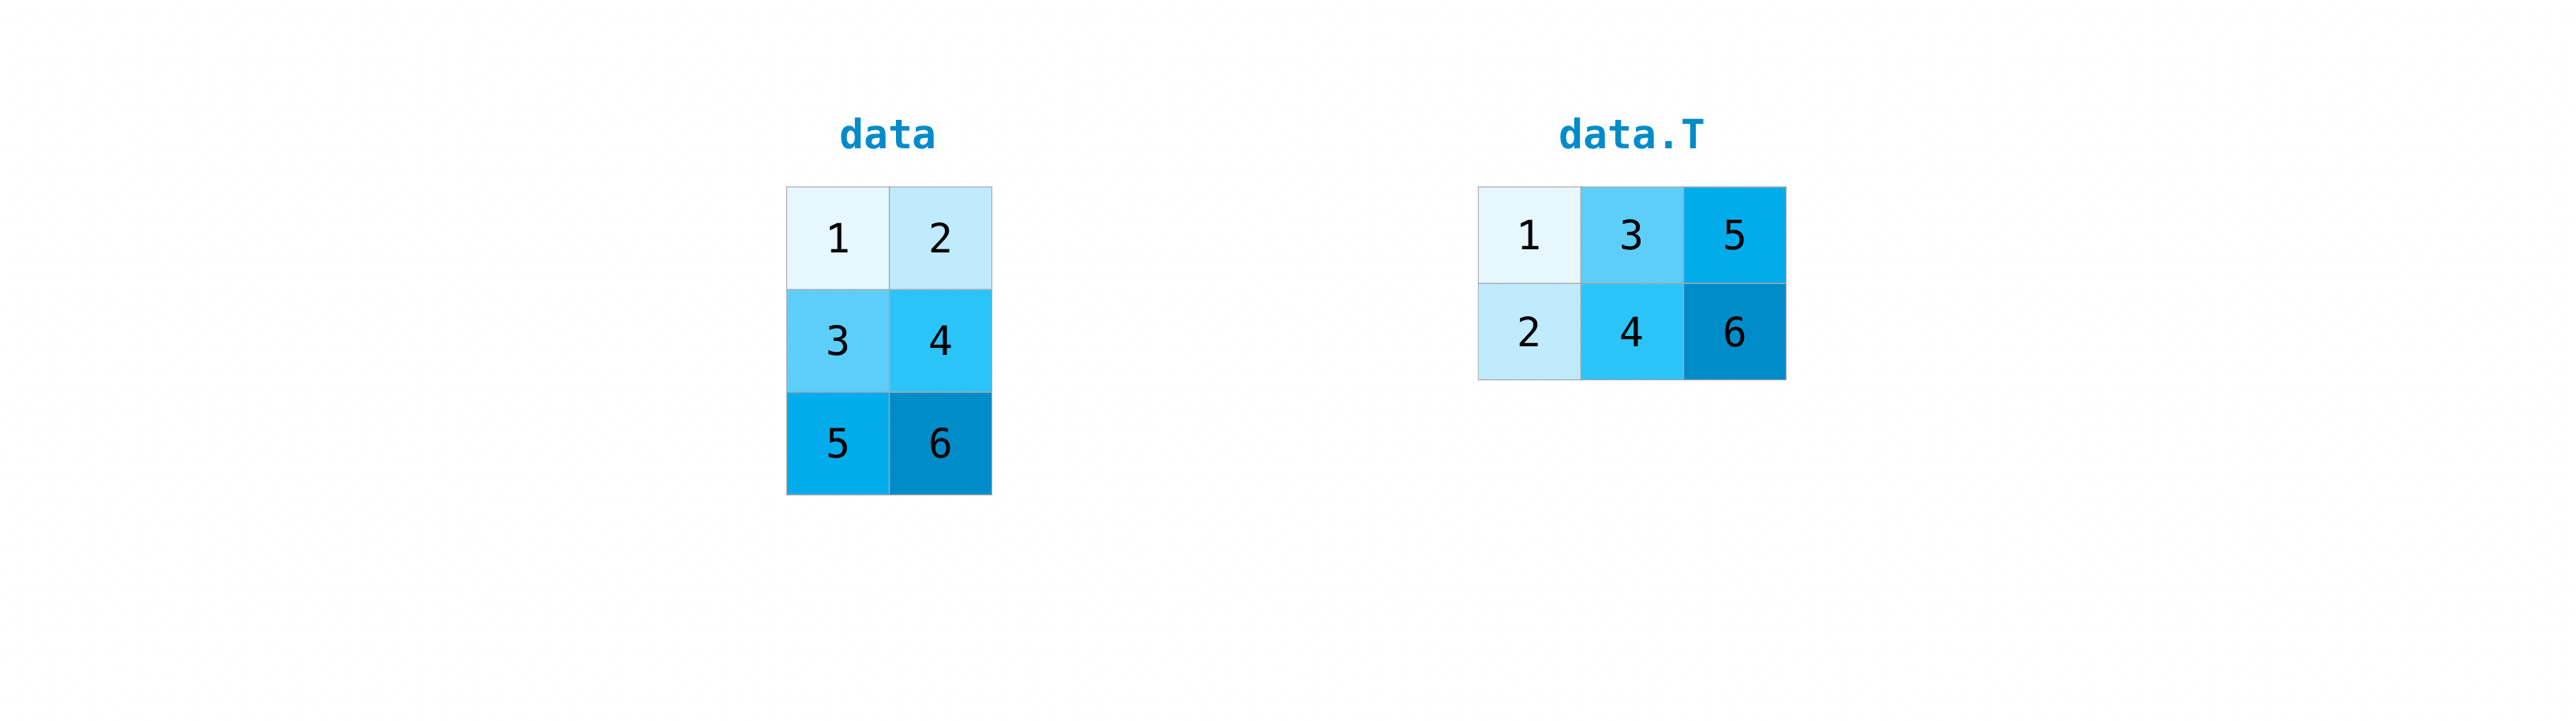

In [ ]:
arr = np.array([[[0.11, 0.22, 0.33],
                 [0.44, 0.55, 0.66]]])

print("Original array",arr.shape)
# print(arr.T.shape)
print()
print("Transposed array",arr.transpose().shape)

# try arr.transpose(0,1)
# what do you see?  

Original array (1, 2, 3)

Transposed array (3, 2, 1)


Using `arr.reshape()` will give a new shape to an array without changing the data.<br><br>

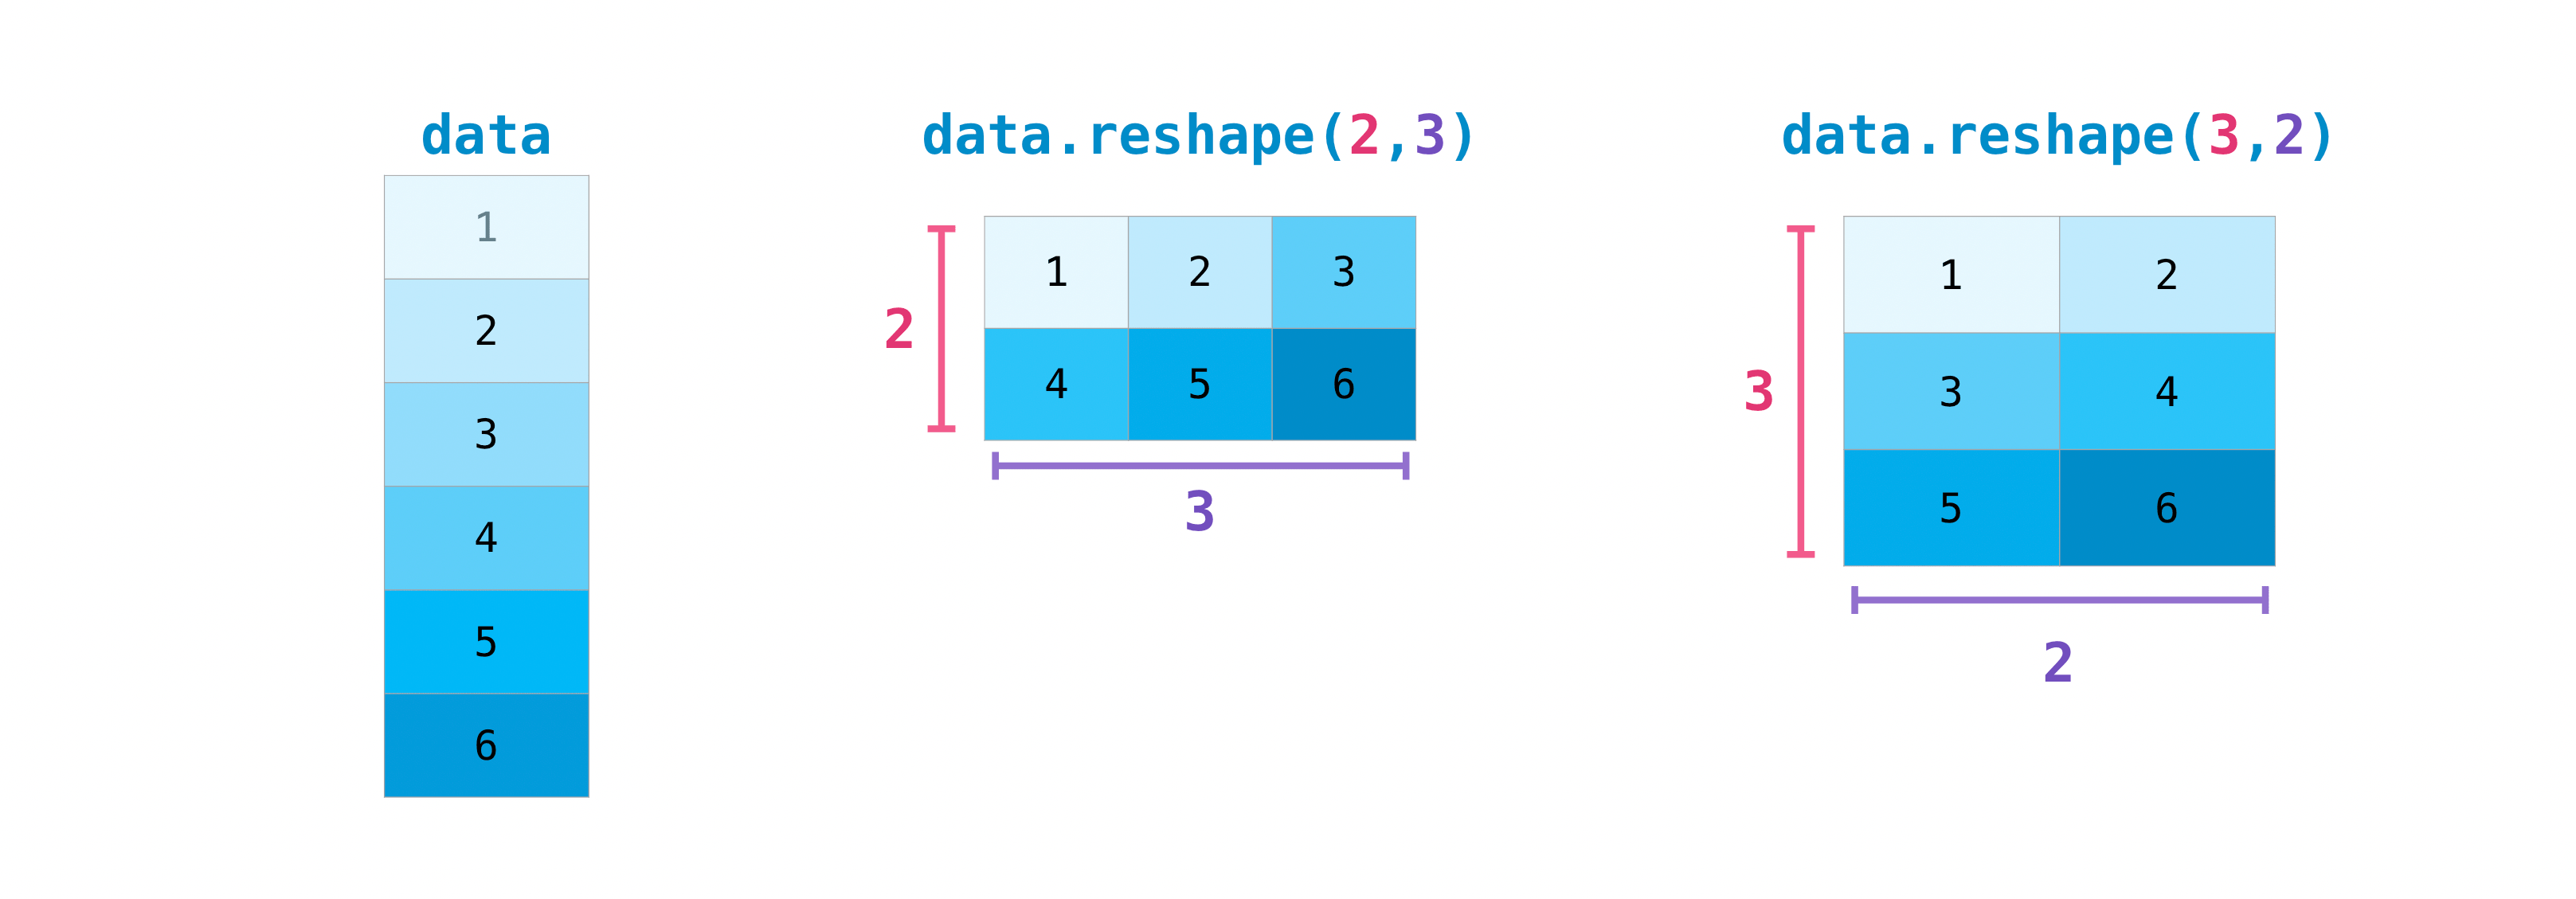

In [ ]:
arr = np.arange(1,7)
arr

array([1, 2, 3, 4, 5, 6])

In [ ]:
arr.reshape(1,3) # size = np.prod(shape)

ValueError: ignored

In [ ]:
arr.reshape(2,3)

array([[[1, 2],
        [3, 4],
        [5, 6]]])